<a href="https://colab.research.google.com/github/misshp11/Mushroom/blob/main/Diplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
import keras
import cv2
import torch
import tensorflow as tf

from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras import layers
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
from sklearn.metrics import classification_report
import shutil

from PIL import Image

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/mushroom_dataset/train1/"
class_names = os.listdir(data_dir)
#class_names0 = os.listdir(data_dir + class_names[0])
#class_names1 = os.listdir(data_dir + class_names[1])
#class_names2 = os.listdir(data_dir + class_names[2])
#class_names3 = os.listdir(data_dir + class_names[3])
#class_names0123 = class_names0 + class_names1 + class_names2 + class_names3
num_class = len(class_names)

#image_files0 = [[os.path.join(data_dir + class_names[0], class_names0, x) 
#               for x in os.listdir(os.path.join(data_dir + class_names[0], class_names0))] 
#               for class_names0 in class_names0]

#image_files1 = [[os.path.join(data_dir + class_names[1], class_names1, x) 
#               for x in os.listdir(os.path.join(data_dir + class_names[1], class_names1))] 
#               for class_names1 in class_names1]

#image_files2 = [[os.path.join(data_dir + class_names[2], class_names2, x) 
#               for x in os.listdir(os.path.join(data_dir + class_names[2], class_names2))] 
#               for class_names2 in class_names2]

#image_files3 = [[os.path.join(data_dir + class_names[3], class_names3, x) 
#               for x in os.listdir(os.path.join(data_dir + class_names[3], class_names3))] 
#               for class_names3 in class_names3]

#image_files = image_files0 + image_files1 + image_files2 +image_files3
image_files = [[os.path.join(data_dir, class_names, x) 
               for x in os.listdir(os.path.join(data_dir, class_names))] 
               for class_names in class_names]
print(image_files)
print(num_class)

[['/content/drive/MyDrive/Colab Notebooks/mushroom_dataset/train1/edible-Kalaharituber_pfeilii/Kalaharituber_pfeilii16.png', '/content/drive/MyDrive/Colab Notebooks/mushroom_dataset/train1/edible-Kalaharituber_pfeilii/Kalaharituber_pfeilii22.png', '/content/drive/MyDrive/Colab Notebooks/mushroom_dataset/train1/edible-Kalaharituber_pfeilii/Kalaharituber_pfeilii6.png', '/content/drive/MyDrive/Colab Notebooks/mushroom_dataset/train1/edible-Kalaharituber_pfeilii/Kalaharituber_pfeilii2.png', '/content/drive/MyDrive/Colab Notebooks/mushroom_dataset/train1/edible-Kalaharituber_pfeilii/Kalaharituber_pfeilii31.png', '/content/drive/MyDrive/Colab Notebooks/mushroom_dataset/train1/edible-Kalaharituber_pfeilii/Kalaharituber_pfeilii28.png', '/content/drive/MyDrive/Colab Notebooks/mushroom_dataset/train1/edible-Kalaharituber_pfeilii/Kalaharituber_pfeilii29.png', '/content/drive/MyDrive/Colab Notebooks/mushroom_dataset/train1/edible-Kalaharituber_pfeilii/Kalaharituber_pfeilii19.png', '/content/drive/

In [ ]:
image_file_list = []
image_label_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)

In [ ]:
image_width, image_height = Image.open(image_file_list[0]).size

print('Total image count:', num_total)
print("Image dimensions:", image_width, "x", image_height)
print("Label names:", class_names)
print("Label counts:", [len(image_files[i]) for i in range(num_class)])

Total image count: 7521
Image dimensions: 274 x 184
Label names: ['edible-Kalaharituber_pfeilii', 'edible-Lactarius_deliciosus', 'edible-Lactarius_salmonicolor', 'edible-Lactarius_volemus', 'edible-Lactarius_deterrimus', 'edible-Lactarius_subdulcis', 'edible-Leccinum_versipelle', 'edible-Leccinum_scabrum', 'edible-Macrolepiota_procera', 'edible-Laetiporus_sulphureus', 'edible-Lentinula_edodes', 'edible-Leccinum_aurantiacum', 'edible-Polyporus_mylittae', 'edible-Sparassis_crispa', 'edible-Pleurotus', 'edible-Rhizopogon_luteolus', 'edible-Polyporus_squamosus', 'edible-Pseudohydnum_gelatinosum', 'edible-Suillus_bovinus', 'edible-Phallus_indusiatus', 'edible-Marasmius_oreades', 'edible-Stropharia_rugosoannulata', 'edible-Tuber_borchii', 'edible-Suillus_luteus', 'edible-Tuber_brumale', 'edible-Tricholoma_terreum', 'edible-Suillus_granulatus', 'edible-Tricholoma_matsutake', 'edible-Tremella_fuciformis', 'edible-Tuber_indicum', 'edible-Tuber_aestivum', 'edible-Suillus_tomentosus', 'edible-Tub

In [ ]:
mobile = keras.applications.mobilenet.MobileNet()
#def prepare_image(file):
#    img_path = ''
#    img = image.load_img(img_path + file, target_size=(224, 224))
#    img_array = image.img_to_array(img)
#    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
#    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

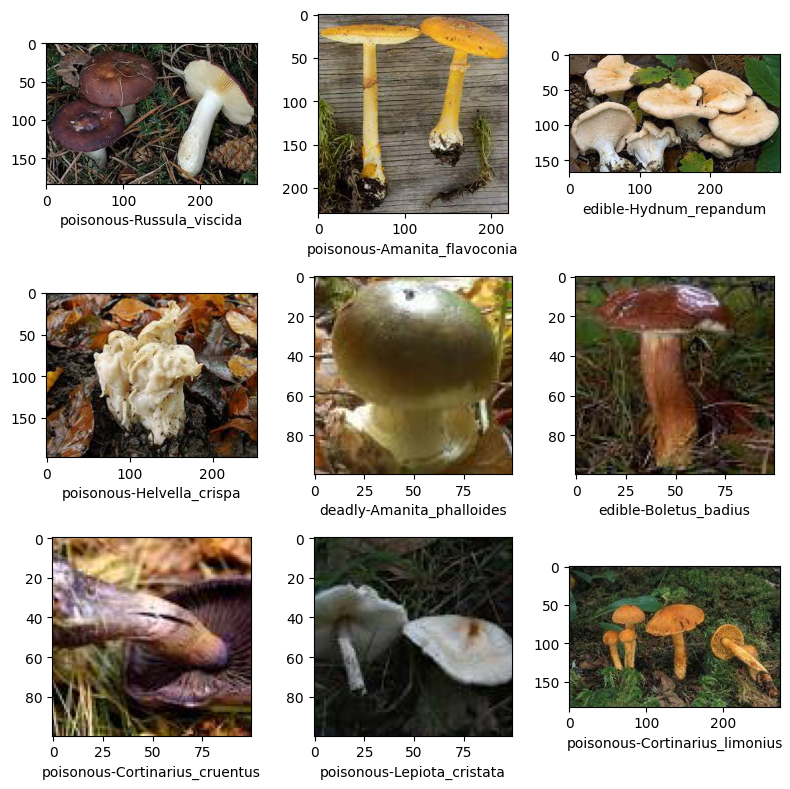

In [ ]:
plt.subplots(3,3, figsize=(8,8))
for i,k in enumerate(np.random.randint(num_total, size=9)):
    im = Image.open(image_file_list[k])
    arr = np.array(im)
    plt.subplot(3,3, i+1)
    plt.xlabel(class_names[image_label_list[k]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

In [ ]:
base_model=MobileNetV2(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(260,activation='softmax')(x) #final 

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_2
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

In [ ]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=mobilenet_v2.preprocess_input)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 7521 images belonging to 260 classes.


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=1)

<ipython-input-14-b6d37b342537>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


235/235 [==============================] - 1274s 5s/step - loss: 5.4533 - accuracy: 0.0135
